# The Heat Equation
- The model problem for the time-dependent PDE reads
$$
\begin{aligned}
\frac{\partial u}{\partial t} & =k(\mathbf{x},\omega)\nabla^2 u+f & & \text { in } \Omega \times(0, T], \\
u & =u_D=0 & & \text { in } \partial \Omega \times(0, T], \\
u & =u_0 & & \text { at } t=0 .
\end{aligned}
$$
- where
    - The variable $u$ is a function of both space and time, i.e., $u = u(\mathbf{x}, t)$, where the spatial domain is denoted by $\Omega(\mathbb{R}^{2})$.
    - The thermal diffusivity $\boldsymbol{x} \in \Omega=[-2,2] \times[-2,2]\subset \mathbb{R}^2$
    - The source function $f$ and boundary values $u_D$ may also vary with space and time.
    - The initial condition $u_0$ is defined in the spatial domain $\Omega(\mathbb{R}^{2})$.<br>

<br>

## Parameter Estimation Problem

Our uncertain paramater in this case is the thermal diffusivity $k(\mathbf{x})$.
Our observations consist of noisy observations of $u(x_j,t_i)$, that is, measurements of $u$ at locations $\{x_j\}_{j=1}^M$ in space and $\{t_i\}_{i=0}^{T}$ times.
Note that our parameter is now populated with noise that may be spatially varying and correlated.
Furthermore note that our uncertain parameter is now a function, and not just simple a point, so we need an effective way of parametrizing $k(\mathbf{x})$ for parameter estimation. 
This is where the KL expansion comes in


### The KL Expansion

We can describe $k(\boldsymbol{x})$ as a stochastic process, $K(\boldsymbol{x}, \omega)$, where $K$ is a function defined on the product
space $\boldsymbol{D} \times \Omega, \boldsymbol{x} \in \boldsymbol{D}$ is the index set of the location of the physical domain, and $\theta \in \Theta$ is
the sample space of the probability space, $(\Theta, \mathcal{F}, P)$.

Given a stochastic process $K(\boldsymbol{x}_{1}, \omega)$, with mean $\mu(\boldsymbol{x})$ and symmetric positive semi- 
definite covariance function $\boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right) \in \Omega \times \Omega \to 
\mathbb{R}$, the Mercer theorem states that $\boldsymbol{C}$ can be decomposed as:
$$
\boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right)=\sum_{j=1}^{\infty} \lambda_j \psi_j(\boldsymbol{x}) \psi_j\left(\boldsymbol{x}_{2}\right),
$$
where $\lambda_j>0$ are the eigenvalues of $\boldsymbol{C}$, and $\psi_j$ are the corresponding normalized eigenvectors. The eigenpairs satisfy the Fredholm equation of the second kind:
$$
\int_{\Omega} \boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right) \psi_j\left(\boldsymbol{x}_{2}\right) d \boldsymbol{x}_{2}=\lambda_j \psi_j(\boldsymbol{x}_{1}), \quad j=1,2, \ldots
$$
Sequencing the eigenvalues in decreasing order, any realization of $K$ can then be written as Ghanem and Spanos (2003)
$$
K(\boldsymbol{x}, \omega)=\mu(\boldsymbol{x})+\sum_{j=1}^{\infty} \sqrt{\lambda_j} \psi_j(\boldsymbol{x}) \xi_j(\omega) .
$$
The coordinate coefficients $\xi_j(\omega)$ can be deterministically computed by evaluating the integrals
$$
\xi_j(\omega)=\int(K(\boldsymbol{x}_{1}, \omega)-\mu(\boldsymbol{x})) \psi_j(\boldsymbol{x}) d \boldsymbol{x}
$$


### KL Expansion for Gaussian Processes

In our case, note $k(\mathbf{x})$ is a Gaussian process $(G P), \xi_j(\omega)$, i.e. it is a Gaussian-independent identically distributed random variables with zero mean and unit variance, such that $\mathbb{E}\left[\xi_j \xi_j^{\prime}\right]=$ $\delta_{j j^{\prime}}$.
The parameter field $K$ is then fully characterized by a set of coordinates $\xi_j$ 's given the eigenbasis is known.
By truncating the series givn above to retain the first few $K$ terms, the KL expansion efficiently approximates the highdimensional parameter field using a few dominant modes.
The size of the retained terms $K$ depends on the desired energy percentage to be retained by the $\mathrm{KL}$ expansion, which is defined as $\sum_{j=1}^K \lambda_j / \sum_{j=1}^{\infty} \lambda_j$.
In practice, it is preferable to choose $K$ such that the truncated $\mathrm{KL}$ expansion encapsulates as much information as possible with respect to its infinite counterpart.
Larger $K$ are required for prior covariance functions with smaller correlation lengths for the $\mathrm{KL}$ expansion to capture a similar information percentage.
There exist several strategies to set $K$ in practice.
For instance, for $\lambda_1 \geq \lambda_2 \geq \ldots$, one can control the representation error on $K$ by selecting $K$ such that $\lambda_K<c \lambda_1$ or $\sum_{j=1}^K \lambda_j \leq c \sum_{j=1}^{\infty} \lambda_j$ for some truncation parameter $c \ll 1$

### Creating the Covariance Matrix

The one thing remaining is to determine the Covariance function $C(x_1, x_2)$ for determining the modes of our KL basis.
The covariance function encodes how correlated spatially we expect our function values to be.
A common kernel used as a Covariance function is based off a square exponential function.

The square exponential kernel function can be represented mathematically as:

$$C(x_i, x_j) = \exp \left( -\frac{1}{2} \sum_{d=1}^{D} \left(\frac{x_{i,d} - x_{j,d}}{\ell_d}\right)^2\right)$$

where $x_i$ and $x_j$ are two $D$-dimensional input vectors, $\ell_d$ is the length scale for dimension $d$ and $\alpha=2$ is a constant.
The covariance matrix, $C$, can be constructed by evaluating this kernel function for each pair of input points and multiplying byhe $\sigma^2$:

$$ C_{i,j} = \sigma^2 * C(x_i, x_j) $$

Note the standard deviation can be specified to be constant over the whole grid, or can be the same size of the grid and specified cell wise. 
The $\sigma$ set should be related to the expected measurement noise in the observation operator.
Note furthermore the importance of the length scale parameters $\ell_d$. 
They in a sense define how smooth we believe our kernel to be.
The large $\ell_d$, the more square exponential kernel will smooth the sum of the different components over the space since they will overlap more.
The smaller the $\ell_d$, the rougher the field we want to represent.

### Forward Model - FEM Formulation

We will use a finite element method to solve the heat equation forward model in our parameter estimation problem. 


- The finite element method is a popular approach for solving time-dependent partial differential equations (PDEs).
- A common technique for discretizing the time derivative involves a finite difference approximation, which leads to a sequence of stationary problems.
- Each of these stationary problems can then be formulated as a variational problem, leading to a set of algebraic equations to solve at each time step.
- To represent quantities at different time levels, we adopt the notation of superscript $n$, where $n$ is an integer counting time levels. For instance, $u^n$ refers to the value of the solution $u$ at time level $n$.
- In the context of finite difference discretization, the initial step involves evaluating the PDE at a particular time level, such as $t_{n+1}$. This allows us to formulate a set of equations that define the solution at the next time step.
- The time-derivative can be approximated by a difference quotient. For simplicity and stability reasons, we choose a simple backward difference, given $\Delta t$ is the time discretization parameter:

$$\left(\frac{\partial u}{\partial t}\right)^{n+1}=\nabla^2 u^{n+1}+f^{n+1} \ \implies \ \left(\frac{\partial u}{\partial t}\right)^{n+1} \approx \frac{u^{n+1}-u^n}{\Delta t}$$

- Inserting the latter expression into our equation at time step $n+1$ yields
$$
\frac{u^{n+1}-u^n}{\Delta t}= k(\mathbf{x})\nabla^2 u^{n+1}+f^{n+1} .
$$

- To solve time-dependent partial differential equations, we typically first discretize the time derivative using a finite difference approximation.
- This results in a sequence of stationary problems that can be solved iteratively to obtain the solution at each time step.
- We can reorganize the resulting equations such that the left-hand side contains only terms with the unknown value $u^{n+1}$, while the right-hand side contains only computed terms.
- This leads to a sequence of stationary problems for $u^{n+1}$, which can be solved assuming that the value of $u^n$ is known from the previous time step.
$$
\begin{aligned}
u^0 & =u_0 \\
u^{n+1}-\Delta t k(\mathbf{x}) \nabla^2 u^{n+1} & =u^n+\Delta t f^{n+1}, \quad n=0,1,2, \ldots
\end{aligned}
$$
Hence given $u_0$, we can iterativly solve $u^0, u^1, u^2, \dots$

- After discretizing the time derivative using a finite difference approximation, we can solve the resulting sequence of stationary problems using the finite element method.
- To do this, we first transform the equation into its weak formulation.
- We do this by multiplying the equation by a test function $v \in \hat{V}$ and integrating the second-order derivatives by parts.
- We then introduce the symbol $u$ to represent the unknown value $u^{n+1}$, and we write the resulting weak formulation in terms of $u$ and $v$.
$$
a(u, v)=L_{n+1}(v),
$$
where
$$
\begin{aligned}
a(u, v) & =\int_{\Omega}(u v+\Delta t k(\mathbf{x}) \nabla u \cdot \nabla v) \mathrm{d} x \\
L_{n+1}(v) & =\int\left(u^n+\Delta t f^{n+1}\right) \cdot v \mathrm{~d} x
\end{aligned}
$$

## Simple Example Solving

The `HeatModel` class allows us to define the parameters of the heat model.

Lets start with a constant $k(\mathbf{x})$ over the space.
Note we define it as a product of two variables, x and y, corresponding to the (x,y) coordinate of each grid point in the grid to compute the thermal diffusivity over.

In [3]:
import importlib
from pydci.examples import heat_model as hm
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

## True k(x) fields

### Test Function 

We make assumptions $\mu_{therm} = 2.0$ and $\xi = 0.5$ for the thermal mean and noise of the true field respectively. 

Now consider the test functions:

- Functional form of $k(x)$:
$$k(\boldsymbol{x}) = \mu_{therm} + (\mu_{therm} * \xi) \sin(\boldsymbol{x}_{0}-1.0)\cos(\boldsymbol{x}_{1} - 1.0)* \exp\left[-2 \left( \left(\frac{\boldsymbol{x}_{0}-1.0}{\sigma}\right)^{2} + \left(\frac{\boldsymbol{x}_{1}-1.0}{\sigma}\right)^{2} \right) \right].$$

- Constant form of $k(x)$:
$$ k(\boldsymbol{x}) = \mu_{therm} + (\mu_{therm} * 0.1 * \varepsilon ) * \mathbf{1} \quad \text{with } \mathbf{1}\in \mathbb{R}^{N}, \ \varepsilon \sim \mathcal{N}(0,1)$$



In [4]:
therm_mean = 1
noise = 0.1

def test_fun(x):
    """
    Functional k(x) that varies with x
    """
    scale = 10.0
    center = [1.0, 1.0]
    m = therm_mean * noise # * np.random.randn(1)
    init = therm_mean + m * np.sin(x[0] - center[0]) * np.cos(x[1] - center[1])*np.exp(
        - 2.0 * (((x[0] - center[0]) / scale )** 2 + ((x[1] - center[1]) / scale) ** 2))
    return init

In [5]:
def const_k(x):
    """ 
    Constant k(x) 
    """
    m = therm_mean + therm_mean * noise * np.random.randn(1)
    return m * np.ones(x[0].shape)

## Initial Conditions

- First Initial Condition: 
$$\exp\left[-\frac{1}{2} \left(\left(\frac{\boldsymbol{x}_{0}-0.01}{5}\right)^{2} + \left(\frac{\boldsymbol{x}_{1}-0.01}{5}\right)^{2} \right) \right]$$
- Second Inital Condition:
$$2* \exp\left[-0.1\left( \left(\boldsymbol{x}_{0}-1.0\right)^{2} + \left(\boldsymbol{x}_{1}-1.0\right)^{2} \right) \right]$$

In [6]:
def init_cond(x):
    return np.exp(-0.5 * ( (x[0] - 0.01) / 5 ) **2 + ( (x[1] + 0.01) / 5 ) **2)

def init_cond(x):
    return 2.0 * np.exp(-0.1 * ( (x[0] - 1.0) ** 2 + (x[1] - 1.0) ** 2 ) )

### Forming Problem

In [12]:
import importlib
from pydci.examples import heat_model as hm
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
from pydci.log import enable_log

enable_log()

therm_mean = 1
noise = 0.1

def init_cond(x):
    return np.exp(-0.5 * ( (x[0] - 0.01) / 5 ) **2 + ( (x[1] + 0.01) / 5 ) **2)

def init_cond(x):
    return 2.0 * np.exp(-0.1 * ( (x[0] - 1.0) ** 2 + (x[1] - 1.0) ** 2 ) )

def const_k(x):
    """ 
    Constant k(x) 
    """
    m = therm_mean + therm_mean * noise * np.random.randn(1)
    return m * np.ones(x[0].shape)

np.random.seed(123)

importlib.reload(hm)
heat_model = hm.HeatModel(max_states=50)
heat_model.estimate_params([0.1, 0.2, 0.3], num_samples=100)

[04/21/23 05:51:01] INFO     Logger initialized                                                           ]8;id=986678;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py\log.py]8;;\:]8;id=920799;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/log.py#78\78]8;;\

                    WARNING  Pyvista not found                                                     ]8;id=822550;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=662287;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/examples/heat_model.py#24\24]8;;\

[04/21/23 05:51:07] INFO     Drawing 100 from uniform at:                                              ]8;id=386521;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=450438;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#251\251]8;;\
                                     loc: [-1.6284459   0.49867272  0.14148925 -2.25944207]                        
                                     scale: [1.0856306  0.99734545 0.2829785  1.50629471]                          

                    INFO     Starting iteration from 0.0 to 0.1                                        ]8;id=502112;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=993831;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#502\502]8;;\

[04/21/23 05:51:08] INFO     end_point: 0.0, [ 0.01746349 -0.00793516 -0.04326798 ...  0.01647496      ]8;id=23827;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=324366;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#169\169]8;;\
                             -0.04465559                                                                           
                               0.00526352]                                                                         

Solving model sample set: |████████████████████| 100/100 [100%] in 1:23.6 (1.19/


[04/21/23 05:52:32] INFO     Starting sequential algorithm with 1                     ]8;id=669764;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=91598;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#191\191]8;;\

                    INFO     Re-initializing problem with split #0                    ]8;id=54097;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=965447;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#193\193]8;;\

                    INFO     all: Trying 1 qoi combs.                                 ]8;id=80481;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=763260;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#206\206]8;;\

                    INFO     Solving using 1 components                                        ]8;id=438278;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=648872;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=537333;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=552065;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=152845;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=401517;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=924714;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=185396;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 3 components                                        ]8;id=996083;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=555283;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=362370;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=586730;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 4 components                                        ]8;id=74245;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=397502;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=126066;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=922661;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=119232;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=895656;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 1 components                                        ]8;id=969990;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=710459;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=676193;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=521092;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=446479;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=288841;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=635347;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=548804;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 3 components                                        ]8;id=100760;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=219774;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=239655;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=353733;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 4 components                                        ]8;id=346968;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=885719;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=177553;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=391797;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=152690;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=44012;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solution                         e_r     kl  lam_MUD_0  lam_MUD_1         ]8;id=237435;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=133653;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#508\508]8;;\
                             lam_MUD_2                                                                             
                             split nc qoi_comb                                                                     
                             0     3  0         1.039549  0.601  -1.101484   1.195382   0.164571  \                
                                                                                                                   
                                                lam_MUD_3  predict_delta  within_thresh  closest                   
                             max_kl                                                                                
                             split nc qoi_comb                                                                     
                             0     3  0         -0.950318       0.039549           True     True                   
                             False  \                                                                              
                                                                                                                   
                                                min_kl                                                             
                             split nc qoi_comb                                                                     
                             0     3  0          False                                                             

                    INFO     Starting iteration from 0.0 to 0.2                                        ]8;id=625582;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=81226;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#502\502]8;;\

[04/21/23 05:52:33] INFO     end_point: 0.10005002501250626, [-0.0456395  -0.01275503 -0.03910852 ...  ]8;id=367313;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=667954;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#169\169]8;;\
                             -0.00274085  0.06407437                                                               
                              -0.10085302]                                                                         

Solving model sample set: |████████████████████| 100/100 [100%] in 2:46.8 (0.60/


[04/21/23 05:55:20] INFO     Starting sequential algorithm with 1                     ]8;id=804332;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=75564;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#191\191]8;;\

                    INFO     Re-initializing problem with split #0                    ]8;id=876861;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=733099;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#193\193]8;;\

                    INFO     all: Trying 1 qoi combs.                                 ]8;id=725693;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=268341;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#206\206]8;;\

                    INFO     Solving using 1 components                                        ]8;id=697866;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=679198;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=276986;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=550520;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=174584;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=118231;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=729407;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=318615;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 3 components                                        ]8;id=449860;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=804933;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=698125;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=579411;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 4 components                                        ]8;id=915989;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=409775;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=418078;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=379488;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=172647;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=495910;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

[04/21/23 05:55:21] INFO     Solving using 1 components                                        ]8;id=451087;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=468753;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=476365;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=324725;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=178169;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=959480;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=990143;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=684925;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 3 components                                        ]8;id=210834;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=81779;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=611649;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=846367;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 4 components                                        ]8;id=862137;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=327715;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=972021;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=892705;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=743161;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=680920;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solution                         e_r        kl  lam_MUD_0  lam_MUD_1      ]8;id=846842;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=131813;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#508\508]8;;\
                             lam_MUD_2                                                                             
                             split nc qoi_comb                                                                     
                             0     1  0         0.716498  0.056122  -1.031071   0.638702   0.273411  \             
                                                                                                                   
                                                lam_MUD_3  predict_delta  within_thresh  closest                   
                             max_kl                                                                                
                             split nc qoi_comb                                                                     
                             0     1  0         -1.455533       0.283502           True     True                   
                             True  \                                                                               
                                                                                                                   
                                                min_kl                                                             
                             split nc qoi_comb                                                                     
                             0     1  0           True                                                             

                    INFO     Starting iteration from 0.10005002501250626 to 0.3                        ]8;id=426864;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=530305;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#502\502]8;;\

[04/21/23 05:55:22] INFO     end_point: 0.20012508756880942, [-0.07430803 -0.01176143  0.07667653 ...  ]8;id=992946;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=550953;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#169\169]8;;\
                             0.05782849 -0.00644546                                                                
                              -0.07991027]                                                                         

Solving model sample set: |████████████████████| 100/100 [100%] in 2:44.1 (0.61/


[04/21/23 05:58:06] INFO     Starting sequential algorithm with 1                     ]8;id=516326;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=43572;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#191\191]8;;\

                    INFO     Re-initializing problem with split #0                    ]8;id=125449;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=945939;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#193\193]8;;\

                    INFO     all: Trying 1 qoi combs.                                 ]8;id=363832;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py\SplitSequentialProblem.py]8;;\:]8;id=875252;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/SplitSequentialProblem.py#206\206]8;;\

                    INFO     Solving using 1 components                                        ]8;id=573697;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=338010;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=818969;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=497451;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=291197;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=130769;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

[04/21/23 05:58:07] INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=595142;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=520342;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 3 components                                        ]8;id=475060;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=672535;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=164776;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=33247;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 4 components                                        ]8;id=604504;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=851511;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=372358;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=930043;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=114026;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=274530;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 1 components                                        ]8;id=440427;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=324397;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=681029;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=303703;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 2 components                                        ]8;id=308743;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=568164;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=813504;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=445942;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 3 components                                        ]8;id=372277;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=975266;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=238463;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=5308;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solving using 4 components                                        ]8;id=645444;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py\PCAMUDProblem.py]8;;\:]8;id=408823;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/PCAMUDProblem.py#212\212]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=610558;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=818539;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Calculating pi_pr by computing KDE on q_lam                          ]8;id=774973;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py\DCIProblem.py]8;;\:]8;id=207582;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/consistent_bayes/DCIProblem.py#207\207]8;;\

                    INFO     Solution                         e_r        kl  lam_MUD_0  lam_MUD_1      ]8;id=953228;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=727641;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#508\508]8;;\
                             lam_MUD_2                                                                             
                             split nc qoi_comb                                                                     
                             0     1  0         0.598889  0.111133  -1.338692   0.958682   0.106692  \             
                                                                                                                   
                                                lam_MUD_3  predict_delta  within_thresh  closest                   
                             max_kl                                                                                
                             split nc qoi_comb                                                                     
                             0     1  0         -1.487782       0.401111           True     True                   
                             True  \                                                                               
                                                                                                                   
                                                min_kl                                                             
                             split nc qoi_comb                                                                     
                             0     1  0           True                                                             

In [13]:
heat_model.probs[-1].split_results

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2   
split nc qoi_comb                                                        
0     1  0         0.598889  0.111133  -1.338692   0.958682   0.106692  \
      2  0         0.350337  0.131322  -1.338692   0.958682   0.106692   
      3  0         0.200946  0.132993  -1.193794   1.205631   0.377864   
      4  0         0.092462  0.158976  -1.338692   0.958682   0.106692   

                   lam_MUD_3  predict_delta  within_thresh  closest  max_kl   
split nc qoi_comb                                                             
0     1  0         -1.487782       0.401111           True     True    True  \
      2  0         -1.487782       0.649663          False    False   False   
      3  0         -1.558878       0.799054          False    False   False   
      4  0         -1.487782       0.907538          False    False   False   

                   min_kl  
split nc qoi_comb          
0     1  0           True  
      2  0          False  
      3  0          False  
      4  0          False

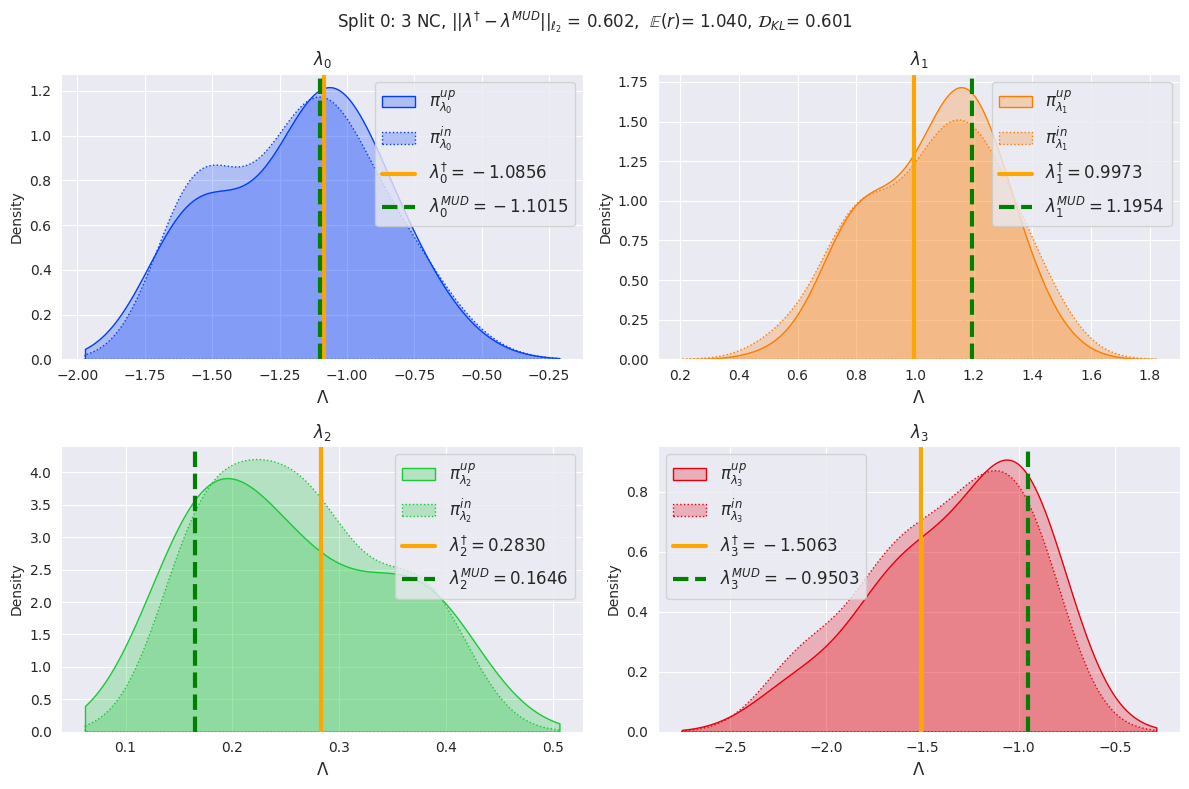

In [30]:
heat_model.probs[0].param_density_plots(lam_true=heat_model.lam_true)

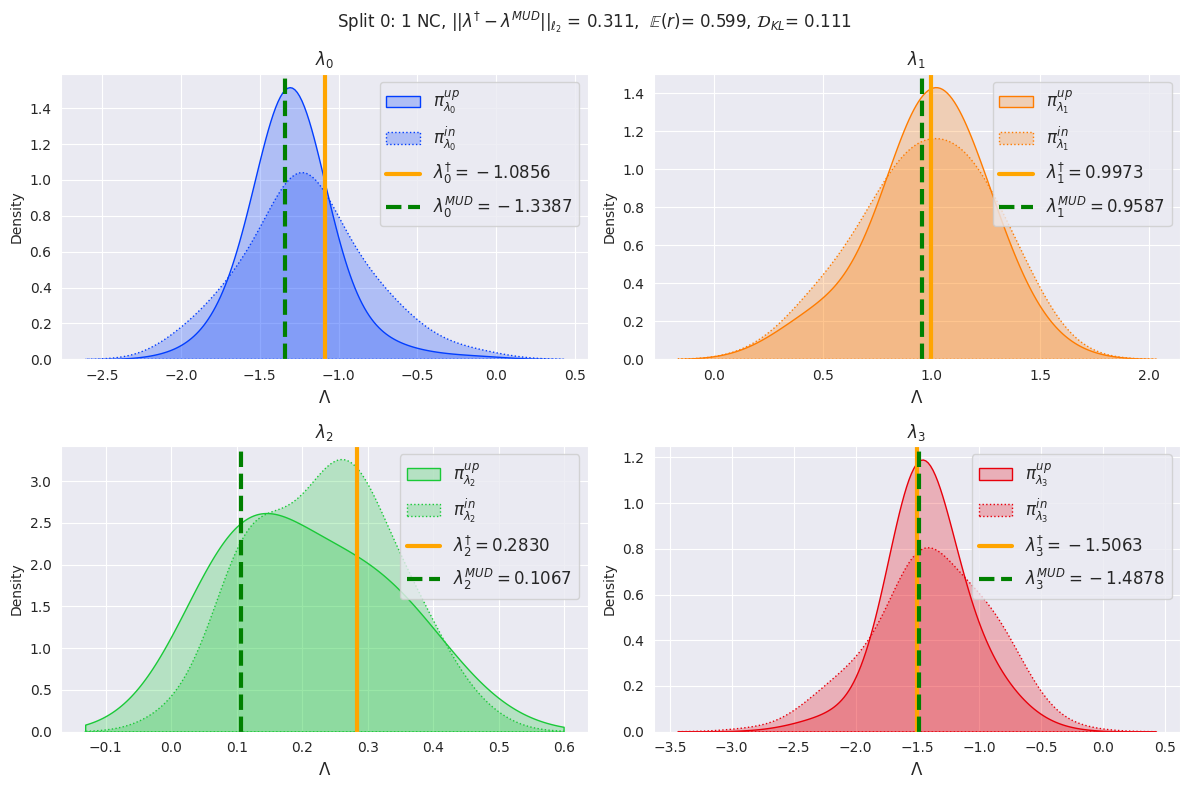

In [15]:
heat_model.probs[-1].param_density_plots(lam_true=heat_model.lam_true)

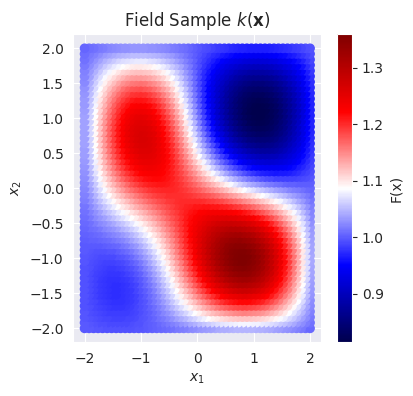

In [16]:
heat_model.plot_field(field=heat_model.probs[-1].mud_point)

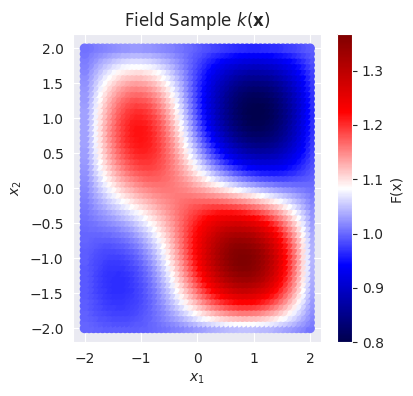

In [17]:
heat_model.plot_field(field=heat_model.lam_true)

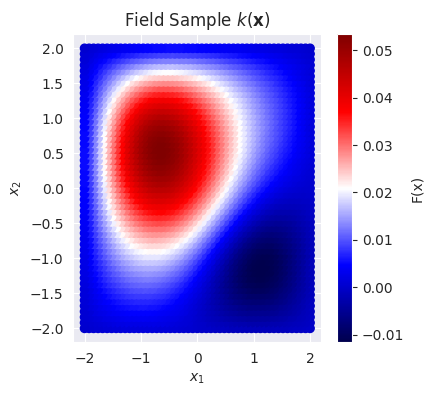

In [18]:
heat_model.plot_field(field=heat_model.probs[-1].mud_point, diff=heat_model.lam_true)

# test 2

Increase number of params

In [ ]:
np.random.seed(123)

importlib.reload(hm)
heat_model2 = hm.HeatModel(nmodes=10, max_states=50)
heat_model2.estimate_params([0.1, 0.2, 0.3, 0.4, 0.5], num_samples=100)

[04/21/23 06:13:30] WARNING  Pyvista not found                                                     ]8;id=37718;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/examples/heat_model.py\heat_model.py]8;;\:]8;id=429962;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/examples/heat_model.py#24\24]8;;\

[04/21/23 06:13:36] INFO     Drawing 100 from uniform at:                                              ]8;id=675452;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=246421;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#251\251]8;;\
                                     loc: [-1.6284459   0.49867272  0.14148925 -2.25944207 -0.86790038             
                             0.82571827                                                                            
                              -3.64001887 -0.64336894  0.63296813 -1.3001106 ]                                     
                                     scale: [1.0856306  0.99734545 0.2829785  1.50629471 0.57860025                
                             1.65143654                                                                            
                              2.42667924 0.42891263 1.26593626 0.8667404 ]                                         

                    INFO     Starting iteration from 0.0 to 0.1                                        ]8;id=313636;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=163885;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#502\502]8;;\

[04/21/23 06:13:37] INFO     end_point: 0.0, [ 0.05486596  0.0069361  -0.04177233 ... -0.04220415      ]8;id=540862;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py\Model.py]8;;\:]8;id=198414;file:///home/jupyter/MyData/repos/pyDCI/src/pydci/Model.py#169\169]8;;\
                             -0.09562734                                                                           
                               0.00950829]                                                                         

Solving model sample set: |██████▋             | ▂▂▄ 33/100 [33%] in 27s (~57s, 

In [21]:
heat_model2.probs[-1].split_results

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2   
split nc qoi_comb                                                        
0     1  0         0.565419  0.394487  -0.716982   1.679628   0.570665  \
      2  0         0.216006  0.524723  -0.590240   1.052694   0.300730   
      3  0         0.100875  0.494597  -0.590240   1.052694   0.300730   
      4  0         0.047903  0.434479  -0.590240   1.052694   0.300730   
      5  0         0.004259  0.525457  -1.180029   0.983414   0.447064   
      6  0         0.000816  1.018789  -0.575421   0.587249   0.040367   
      7  0         0.000460  1.079205  -0.575421   0.587249   0.040367   
      8  0         0.000084  1.540604  -1.098010   0.845948   0.011891   
      9  0         0.000043  1.800293  -1.098010   0.845948   0.011891   
      10 0         0.000014  1.646176  -0.716982   1.679628   0.570665   

                   lam_MUD_3  lam_MUD_4  lam_MUD_5  lam_MUD_6  lam_MUD_7   
split nc qoi_comb                                                          
0     1  0         -1.031287  -0.868979   2.037876  -4.117301  -0.362467  \
      2  0         -2.046628  -0.121896   2.232244  -2.191623  -0.118790   
      3  0         -2.046628  -0.121896   2.232244  -2.191623  -0.118790   
      4  0         -2.046628  -0.121896   2.232244  -2.191623  -0.118790   
      5  0         -0.574936  -0.539496   0.049587  -2.999707  -0.253100   
      6  0         -1.449368  -0.112898   3.304668  -2.442955  -0.456310   
      7  0         -1.449368  -0.112898   3.304668  -2.442955  -0.456310   
      8  0         -1.118476  -0.256675   1.915368  -0.902907  -0.470322   
      9  0         -1.118476  -0.256675   1.915368  -0.902907  -0.470322   
      10 0         -1.031287  -0.868979   2.037876  -4.117301  -0.362467   

                   lam_MUD_8  lam_MUD_9  predict_delta  within_thresh   
split nc qoi_comb                                                       
0     1  0          2.216736  -1.388417       0.434581           True  \
      2  0         -0.138245  -0.208366       0.783994          False   
      3  0         -0.138245  -0.208366       0.899125          False   
      4  0         -0.138245  -0.208366       0.952097          False   
      5  0          1.418394  -1.759890       0.995741          False   
      6  0          0.576993  -0.406242       0.999184          False   
      7  0          0.576993  -0.406242       0.999540          False   
      8  0          2.135069  -0.120351       0.999916          False   
      9  0          2.135069  -0.120351       0.999957          False   
      10 0          2.216736  -1.388417       0.999986          False   

                   closest  max_kl  min_kl  
split nc qoi_comb                           
0     1  0            True    True    True  
      2  0           False   False   False  
      3  0           False   False   False  
      4  0           False   False   False  
      5  0           False   False   False  
      6  0           False   False   False  
      7  0           False   False   False  
      8  0           False   False   False  
      9  0           False   False   False  
      10 0           False   False   False

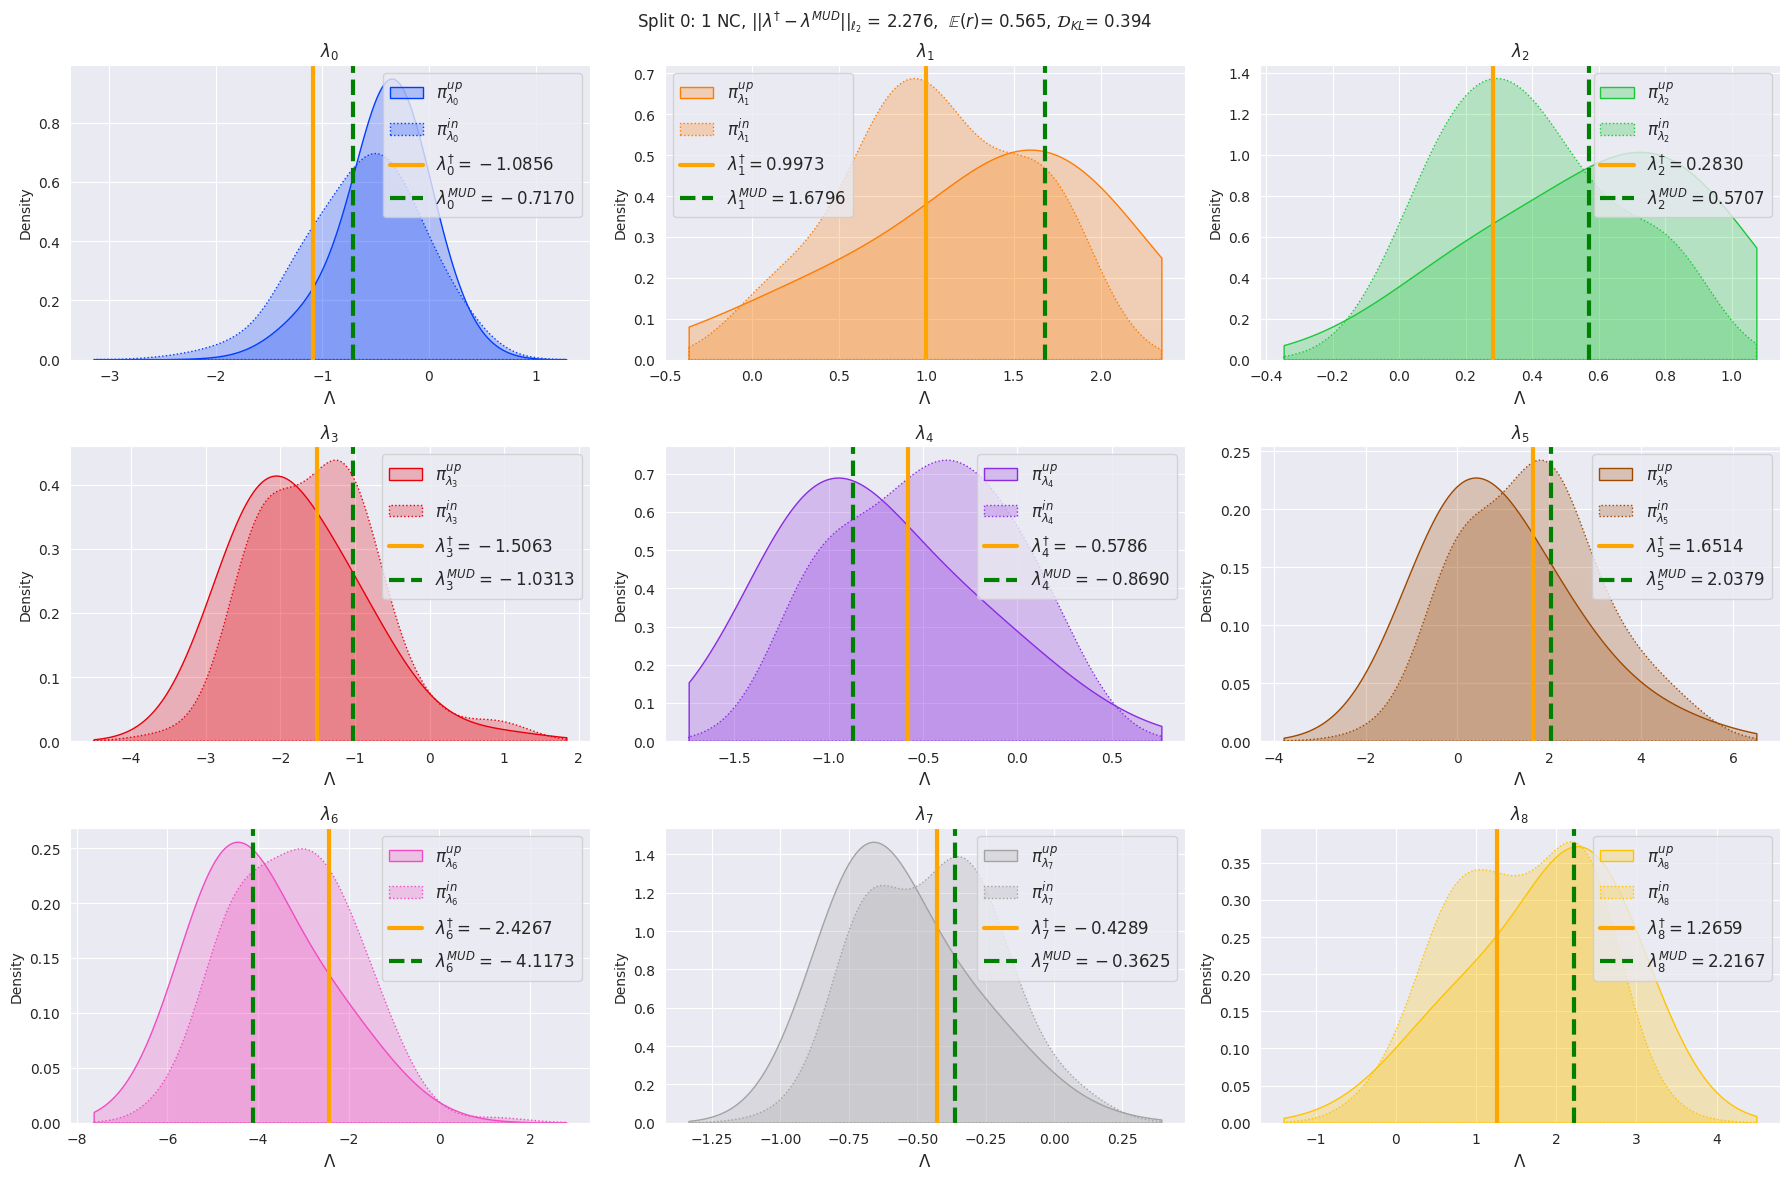

In [43]:
heat_model2.probs[-1].param_density_plots(lam_true=heat_model2.lam_true)

In [29]:
heat_model2.probs[-1].mud_point

array([-0.71698221,  1.67962815,  0.57066484, -1.031287  , -0.86897882,
        2.03787551, -4.11730066, -0.36246691,  2.21673642, -1.38841707])

<bound method Figure.tight_layout of <Figure size 1800x500 with 6 Axes>>

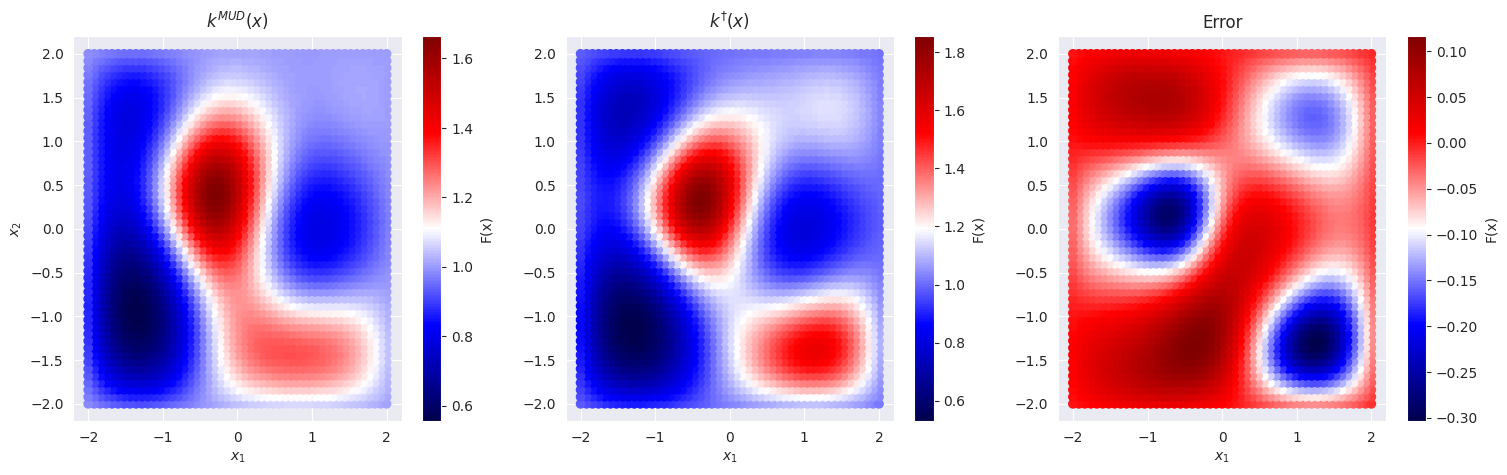

In [44]:
iteration = 0
fig, ax = plt.subplots(1, 3, figsize=(18,5))
heat_model2.plot_field(field=heat_model2.probs[iteration].mud_point, ax=ax[0])
ax[0].set_title('$k^{MUD}(x)$')
heat_model2.plot_field(field=heat_model2.lam_true, ax=ax[1])
ax[1].set_title('$k^{\dagger}(x)$')
ax[1].set_ylabel('')
heat_model2.plot_field(field=heat_model2.probs[iteration].mud_point, diff=heat_model2.lam_true, ax=ax[2])
ax[2].set_title('Error')
ax[2].set_ylabel('')
fig.tight_layout

TypeError: 'int' object is not subscriptable

## Old

In [47]:
importlib.reload(hm)
model_config= {
        "T":1, 
        "t":0.0,       
        "dt": 0.0001,
        "sample_ts": 0.05,
        "nx": 50,
        "ny": 50,     
        "mean": therm_mean,
        "std_dev": noise,
        "length_scales": [0.1, 0.1],
        "nmodes": 25,
        "true_k_x":  const_k,
        "init_cond": init_cond,
}
heat_model = hm.HeatModel(**model_config)
heat_model.true_params.max(), heat_model.true_params.min()

ImportError: cannot import name 'normal' from 'scipy.stats.distributions' (/opt/conda/envs/fenics/lib/python3.10/site-packages/scipy/stats/distributions.py)

In [49]:
heat_model.num_steps

10000

In [52]:
heat_model.u_n.x.array

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
heat_model.plot_field(init_cond, ax=ax[0]),
heat_model.plot_field(heat_model.true_params, ax=ax[1], project=True)
heat_model.plot_field(field=test_fun, diff=heat_model.true_params, ax=ax[2])
ax[0].set_title('Initial Condition')
ax[1].set_title('Reconstructed k(x)')
ax[2].set_title('k(x) KL Expansion Error')
fig.tight_layout()

In [38]:
sol = heat_model.run_model()
sol

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_191,t_192,t_193,t_194,t_195,t_196,t_197,t_198,t_199,t_200
0,0.747147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.735759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.771443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.783384,0.259930,0.149471,0.106652,0.083652,0.069210,0.059260,0.051969,0.046385,0.041964,...,0.002829,0.002811,0.002793,0.002775,0.002757,0.002739,0.002722,0.002704,0.002687,0.002670
4,0.757742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,0.783384,0.259757,0.149375,0.106588,0.083604,0.069172,0.059229,0.051941,0.046359,0.041940,...,0.002861,0.002843,0.002825,0.002807,0.002790,0.002772,0.002754,0.002737,0.002720,0.002703
2597,0.807823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2598,0.747147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2599,0.771443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


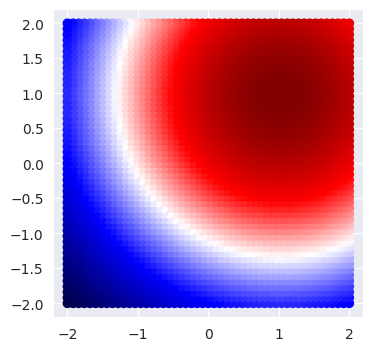

In [39]:
ax, kwargs = heat_model._init_axis()
ax.scatter(heat_model.coords[:, 0], heat_model.coords[:, 1], c= sol['t_0'], cmap='seismic')

## Generating Ensemble


In [40]:
nsamples = 3
params, samples = heat_model.run_samples(nsamples=nsamples)

|████████████████████████████████████████| 3/3 [100%] in 24.4s (0.11/s)         


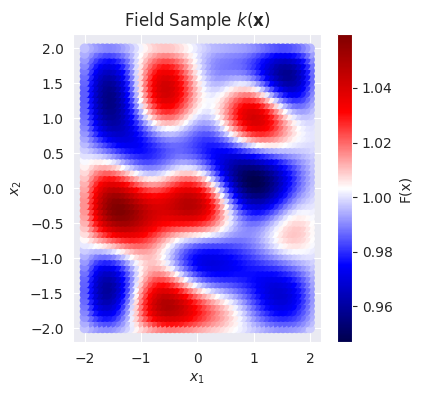

In [41]:
heat_model.plot_field(field=params[0])

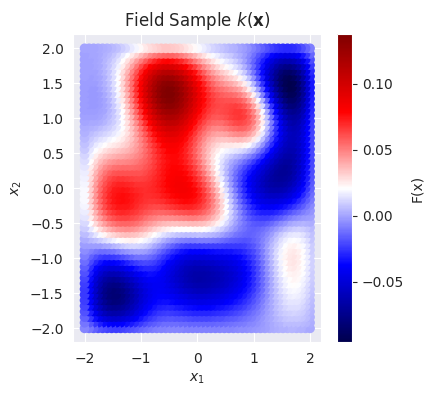

In [42]:
heat_model.plot_field(field=params[0], diff=heat_model.true_params)

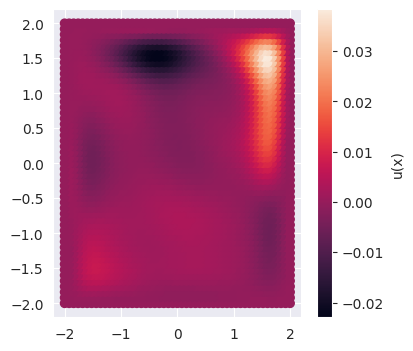

In [45]:
heat_model.plot_solution(samples.loc['s_0'] - sol, idx=10)

## Pyvista Gifs

In [9]:
gif_file = 'true_sol.gif'
heat_model.output_gif(sol, gif_file)
Image(url='true_sol.gif')  

|███████████████████████████████████████▊⚠︎ (!) 200/201 [100%] in 9.7s (20.60/s)                                         


In [53]:
samples.loc['s_0']

,t_0,t_1,t_2,t_3,t_4,t_5,t_6,t_7,t_8,t_9,...,t_191,t_192,t_193,t_194,t_195,t_196,t_197,t_198,t_199,t_200
0,0.747147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.735759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.771443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.783384,0.150635,0.084023,0.059454,0.046512,0.038470,0.032961,0.028939,0.025864,0.023433,...,0.000855,0.000844,0.000834,0.000823,0.000813,0.000803,0.000793,0.000784,0.000774,0.000764
4,0.757742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596,0.783384,0.151114,0.084212,0.059520,0.046510,0.038423,0.032884,0.028841,0.025751,0.023308,...,0.000858,0.000847,0.000837,0.000827,0.000816,0.000806,0.000796,0.000787,0.000777,0.000767
2597,0.807823,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2598,0.747147,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2599,0.771443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


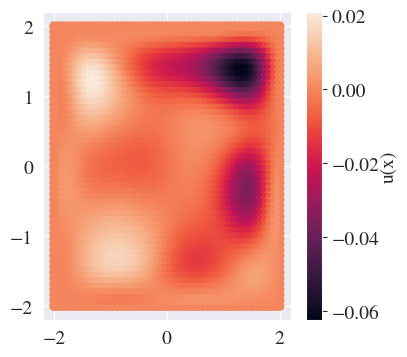

In [48]:
params

array([[ 1.07606376e-01,  8.53172214e-02,  1.65917529e+00,
         1.40716484e+00, -1.41975250e-01,  5.98391307e-01,
         3.53505511e+00,  6.65405112e-01, -4.95831846e-01,
         1.33633101e+00, -7.34247307e-01, -1.45989868e+00,
         1.22395877e+00,  1.68383211e+00,  1.13562181e+00,
         9.10450552e-02, -8.61132197e-01,  6.67201026e-01,
        -8.47047061e-01,  1.83496006e+00],
       [-1.19614059e+00,  1.87440050e+00,  1.59873353e+00,
         1.14929515e-01, -1.87755424e+00,  9.33560369e-01,
        -8.08059760e-01, -7.36865262e-01,  9.30202016e-01,
        -1.06146067e+00,  1.54416193e+00, -2.56659085e-01,
         3.76947045e-01, -2.63893742e-01,  3.57614390e-01,
        -1.23410737e-05,  4.76245007e-01,  3.84694336e-01,
        -7.04017254e-01,  6.07210597e-01],
       [-5.95614832e-01,  5.41332070e-01,  7.78184819e-01,
        -6.06298656e-01, -4.47081110e-01, -7.99454555e-01,
        -9.47691800e-01, -7.26317221e-02, -7.97561732e-01,
         1.18775548e+00,  1.2

In [14]:
heat_model.true_params

array([ 7.79028269, 12.87850847,  7.69520996, 10.50677854,  0.59957415])

In [31]:
# samples.to_csv('test_100.csiiiiv')

In [13]:
params

array([ 0.8308359 ,  0.41905669, -0.26331831, -0.74216173,  0.74240447])

## Residuals

Lets see the residual between observed and predicted for sample.
Note observed here has no noise yet.

In [12]:
idx = 1
gif_fname = f's_{idx}.gif'
heat_model.output_gif(samples.loc[f's_{idx}'], gif_fname, diff=sol)
Image(url=gif_fname)  

|███████████████████████████████████████▊⚠︎ (!) 200/201 [100%] in 8.9s (22.44/s)                                         


## Spatio Temporal Problem

First lets sample the grid

In [ ]:
import random
import pandas as pd
from mud.base import SpatioTemporalProblem as STP

In [36]:
num_sensors = 500
sensor_idxs = random.sample(range(1, len(heat_model.coords[:,0]) + 1), num_sensors)
true = sol.loc[sensor_idxs].to_numpy().reshape(1, -1)
data = samples.loc[pd.MultiIndex.from_product(
    [samples.index.levels[0], sensor_idxs])].to_numpy().reshape(
    nsamples, 201, num_sensors)
domain = [[1.1 * heat_model.true_params.min(), 1.1 * heat_model.true_params.max()]] * heat_model.nmodes
sensors = heat_model.coords[sensor_idxs]
times = np.arange(0, len(sol.columns))

In [45]:
noise = 0.1
stp = STP(
                df={
                "sample_dist": "u",
                "domain": domain,
                "sensors": sensors,
                "times": times,
                "lam_ref": heat_model.true_params,
                "std_dev": noise,
                "true_vals": true,
                "lam": params,
                "data": data,
            }
    )
stp.measurements_from_reference()

<Axes: >

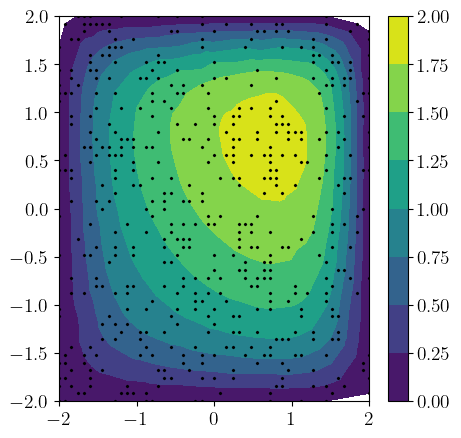

In [46]:
ts = 10
_, ax = plt.subplots(1, 1, figsize=(5, 5))
stp.sensor_contour_plot(
    c_vals=stp.data[0].reshape(num_sensors, num_ts)[:,ts],
    ax=ax)
stp.sensor_scatter_plot(ax=ax, marker='x', color='k', s=2)

In [53]:
prob = stp.mud_problem(times_mask=np.arange(5))
estimate = prob.estimate()
prob.expected_ratio()

0.028411461890579137

In [54]:
np.linalg.norm(heat_model.true_params - estimate)

17.95639725703796

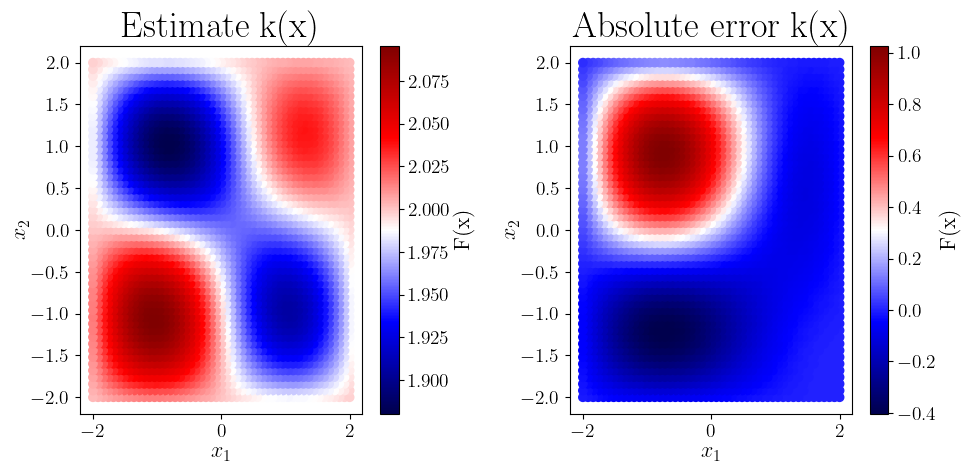

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
heat_model.plot_field(estimate, ax=ax[0]),
heat_model.plot_field(estimate, ax=ax[1], diff=heat_model.true_params)
_ = ax[0].set_title('Estimate k(x)')
_ = ax[1].set_title('Absolute error k(x)')
fig.tight_layout()

## Creating Samples for forward runs

In [2]:
importlib.reload(HeatModel)
model_config= {
       "T":1.0, 
        "t":0.0,       
        "num_steps":50,
        "dt": 1.0/50,
        "nx": 50,
        "ny": 50,     
        "std_dev": 1.0,
        "length_scales": [1.1, 1.1],
        "nmodes": 20,
        "true_k_x": 1.0
}
nsamples = 1
heat_model, params, samples = HeatModel.setup_and_run(model_config, nsamples=nsamples)
samples

NameError: name 'importlib' is not defined

In [3]:
heat_model.plot_field(params[0])

NameError: name 'heat_model' is not defined

In [69]:
idx = 0
gif_fname = f's_{idx}.gif'
heat_model.output_gif(samples.loc[f's_{idx}'], gif_fname)
Image(url=gif_fname)  

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 4, figsize=(14, 4))
heat_model.plot_solution(sol, idx=0, ax=ax[0])
heat_model.plot_solution(sol, idx=1, ax=ax[1])
heat_model.plot_solution(sol, idx=2, ax=ax[2])
heat_model.plot_solution(sol, idx=3, ax=ax[3])

In [20]:
import numpy as np
idx = 3
ts = 4
np.sum(samples.loc[f's_{idx}'][f't_{ts}'] - sol[f't_{ts}'])

9.97088730211957e-15

In [21]:
def true_k_x(x, y):
    return x**3 + y**3

importlib.reload(HeatModel)
model_config= {
       "T":1.0, 
        "t":0.0,       
        "num_steps":50,
        "dt": 1.0/50,
        "nx": 50,
        "ny": 50,     
        "std_dev": 1.0,
        "length_scales": [1.1, 1.1],
        "nmodes": 20,
        "true_k_x": true_k_x
}
nsamples = 1
heat_model, params, samples = HeatModel.setup_and_run(model_config, nsamples=nsamples)

|████████████████████████████████████████| 1/1 [100%] in 0.1s (9.42/s)                                                  


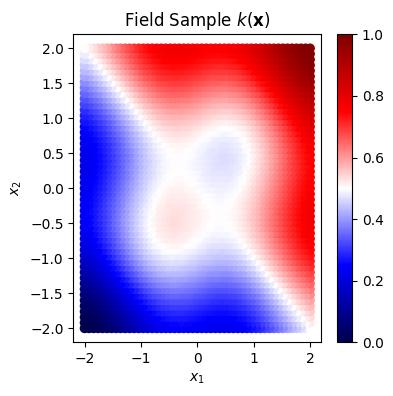

In [23]:
heat_model.plot_field()

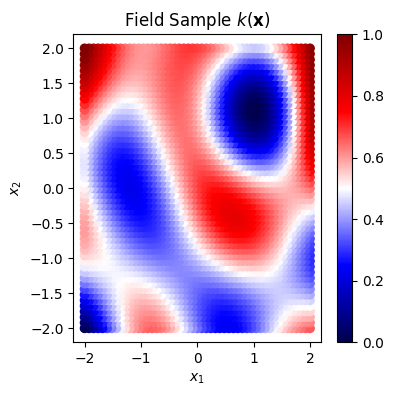

In [22]:
heat_model.plot_field(params[0])

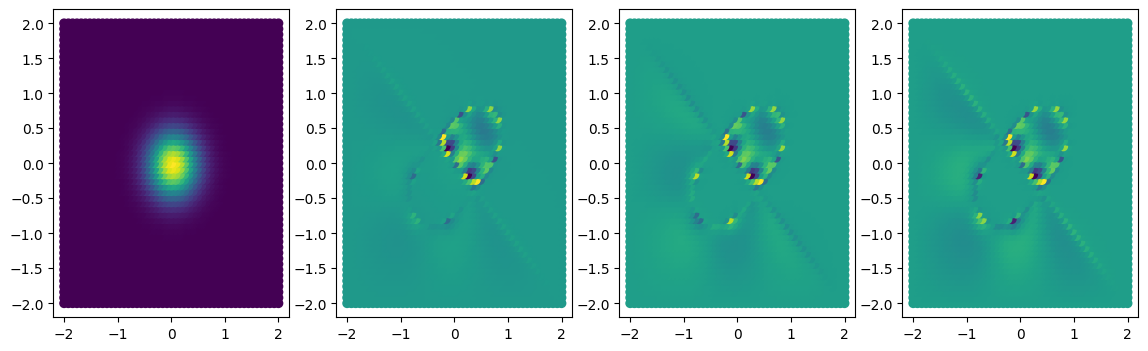

In [29]:
import matplotlib.pyplot as plt
heat_model.reset_sim()
sol = heat_model.run_model(params[0])
fig, ax = plt.subplots(1, 4, figsize=(14, 4))
heat_model.plot_solution(sol, idx=0, ax=ax[0])
heat_model.plot_solution(sol, idx=1, ax=ax[1])
heat_model.plot_solution(sol, idx=2, ax=ax[2])
heat_model.plot_solution(sol, idx=3, ax=ax[3])

# Manning's N

The Manning's $n$ roughness parameters physically characterizing the seabed surface are generally continuous in space, with correlated neighboring values. 
It is therefore effective to describe a Manning's $n$ field as a stochastic process, $K(\boldsymbol{x}, \omega)$, where $K$ is a function defined on the product
space $\boldsymbol{D} \times \Omega, \boldsymbol{x} \in \boldsymbol{D}$ is the index set of the location of the physical domain, and $\omega \in \Omega$ is
the sample space of the probability space, $(\Omega, \mathcal{F}, P)$. Given a stochastic process $K(\boldsymbol{x}_{1}, \omega)$, with mean $\mu(\boldsymbol{x})$ and symmetric positive semi- 
definite covariance function $\boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right)$, the Mercer theorem states that $\boldsymbol{C}$ can be decomposed as:
$$
\boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right)=\sum_{j=1}^{\infty} \lambda_j \psi_j(\boldsymbol{x}) \psi_j\left(\boldsymbol{x}_{2}\right),
$$
where $\lambda_j>0$ are the eigenvalues of $\boldsymbol{C}$, and $\psi_j$ are the corresponding normalized eigenvectors. The eigenpairs satisfy the Fredholm equation of the second kind:
$$
\int_{\Omega} \boldsymbol{C}\left(\boldsymbol{x}_{1}, \boldsymbol{x}_{2}\right) \psi_j\left(\boldsymbol{x}_{2}\right) d \boldsymbol{x}_{2}=\lambda_j \psi_j(\boldsymbol{x}_{1}), \quad j=1,2, \ldots
$$
Sequencing the eigenvalues in decreasing order, any realization of $K$ can then be written as Ghanem and Spanos (2003)
$$
K(\boldsymbol{x}, \omega)=\mu(\boldsymbol{x})+\sum_{j=1}^{\infty} \sqrt{\lambda_j} \psi_j(\boldsymbol{x}) \xi_j(\omega) .
$$
The coordinate coefficients $\xi_j(\omega)$ can be deterministically computed by evaluating the integrals
$$
\xi_j(\omega)=\int(K(\boldsymbol{x}_{1}, \omega)-\mu(\boldsymbol{x})) \psi_j(\boldsymbol{x}) d \boldsymbol{x}
$$

In case $K$ is a Gaussian process $(G P), \xi_j(\omega)$ are Gaussian-independent identically distributed random variables with zero mean and unit variance, such that $\mathbb{E}\left[\xi_j \xi_j^{\prime}\right]=$ $\delta_{j j^{\prime}}$. The parameter field $K$ is then fully characterized by a set of coordinates $\xi_j$ 's given the eigenbasis is known. By truncating the series givn above to retain the first few $K$ terms, the KL expansion efficiently approximates the highdimensional parameter field using a few dominant modes. The size of the retained terms $K$ depends on the desired energy percentage to be retained by the $\mathrm{KL}$ expansion, which is defined as $\sum_{j=1}^K \lambda_j / \sum_{j=1}^{\infty} \lambda_j$. In practice, it is preferable to choose $K$ such that the truncated $\mathrm{KL}$ expansion encapsulates as much information as possible with respect to its infinite counterpart. Larger $K$ are required for prior covariance functions with smaller correlation lengths for the $\mathrm{KL}$ expansion to capture a similar information percentage. There exist several strategies to set $K$ in practice. For instance, for $\lambda_1 \geq \lambda_2 \geq \ldots$, one can control the representation error on $K$ by selecting $K$ such that $\lambda_K<c \lambda_1$ or $\sum_{j=1}^K \lambda_j \leq c \sum_{j=1}^{\infty} \lambda_j$ for some truncation parameter $c \ll 1$